In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
def ler_resultados(dataset, algoritmo, modelo):
    """
    Ler os resultados do experimento. 
    
    Args:
        dataset (string): 'sunspot' ou 'ariline', 'hit', 'aws', 'sp500' ou 'dmt'
        algoritmo (string): 'pso' ou 'cqso'
        
    Retorna:
        dicionário contendo duas chaves: treino e teste, com quatro listas (cenários) cada uma.
        
    """
    
    if modelo == 'mlp':
        dados_dir_treino = [f'resultados/{dataset}_resultados_mse_treino_{dataset}_{algoritmo}_{i}.csv' for i in range(1, 5)]
        dados_dir_teste = [f'resultados/{dataset}_resultados_mse_teste_{dataset}_{algoritmo}_{i}.csv' for i in range(1, 5)]
    
    elif modelo == 'svr':
        dados_dir_treino = [f'resultados/svr_{dataset}_resultados_mse_treino_{dataset}_{algoritmo}_{i}.csv' for i in range(1, 5)]
        dados_dir_teste = [f'resultados/svr_{dataset}_resultados_mse_teste_{dataset}_{algoritmo}_{i}.csv' for i in range(1, 5)]
    
    else:
        print('Modelo não existe')
        
    # treino
    dados = {
        'treino': [],
        'teste': [],
    }
    
    for i in dados_dir_treino:
        
        if algoritmo == 'pso':
            dados_temp = pd.read_csv(i).transpose()[1:]
            dados_temp.index = [i for i in range(1, len(dados_temp)+1)]
            
        elif algoritmo == 'cqso':
            dados_temp = pd.read_csv(i).transpose()
            dados_temp.index = [i for i in range(1, len(dados_temp)+1)]
        
        dados['treino'].append(dados_temp)
        
        
        
    # teste
    
    for i in dados_dir_teste:
        
        if algoritmo == 'pso':
            dados_temp = pd.read_csv(i).transpose()[1:]
            dados_temp.index = [i for i in range(1, len(dados_temp)+1)]
            
        elif algoritmo == 'cqso':
            dados_temp = pd.read_csv(i).transpose()
            dados_temp.index = [i for i in range(1, len(dados_temp)+1)]
        
        dados['teste'].append(dados_temp)
    
    return dados

## Ler os dados

In [40]:
# MLP
datasets = ['sunspot', 'airline', 'aws', 'sp500', 'usd']
algoritmos = ['pso', 'cqso']
modelos = ['mlp', 'svr']


datasets_dict = dict.fromkeys(datasets)

for data in datasets:
    algoritmos_dict = dict.fromkeys(algoritmos)

    for algo in algoritmos:
        
        modelos_dict = dict.fromkeys(modelos)
        
        for modelo in modelos:
            modelos_dict[modelo] = ler_resultados(data, algo, modelo) 
        
        algoritmos_dict[algo] = modelos_dict
        
    datasets_dict[data] = algoritmos_dict
        
    
# # # sunspot
sunspot_pso_mlp = datasets_dict['sunspot']['pso']['mlp']
sunspot_pso_svr = datasets_dict['sunspot']['pso']['svr']

sunspot_cqso_mlp = datasets_dict['sunspot']['cqso']['mlp']
sunspot_cqso_svr = datasets_dict['sunspot']['cqso']['svr']

# # # airline
airline_pso_mlp = datasets_dict['airline']['pso']['mlp']
airline_pso_svr = datasets_dict['airline']['pso']['svr']

airline_cqso_mlp = datasets_dict['airline']['cqso']['mlp']
airline_cqso_svr = datasets_dict['airline']['cqso']['svr']

# # # aws
aws_pso_mlp = datasets_dict['aws']['pso']['mlp']
aws_pso_svr = datasets_dict['aws']['pso']['svr']

aws_cqso_mlp = datasets_dict['aws']['cqso']['mlp']
aws_cqso_svr = datasets_dict['aws']['cqso']['svr']

# # # sp500
sp500_pso_mlp = datasets_dict['sp500']['pso']['mlp']
sp500_pso_svr = datasets_dict['sp500']['pso']['svr']

sp500_cqso_mlp = datasets_dict['sp500']['cqso']['mlp']
sp500_cqso_svr = datasets_dict['sp500']['cqso']['svr']

# # usd 
usd_pso_mlp = datasets_dict['usd']['pso']['mlp']
usd_pso_svr = datasets_dict['usd']['pso']['svr']

usd_cqso_mlp = datasets_dict['usd']['cqso']['mlp']
usd_cqso_svr = datasets_dict['usd']['cqso']['svr']


In [41]:
# Calcular média e desvio padrão das execuções

def calcular_media(valores):
    
    lista_valores = {
        'treino':[],
        'teste':[],
    }
    
    for conjunto in ['treino', 'teste']:
        
        for i in valores[conjunto]:  
            
            lista_valores[conjunto].append(i.mean(axis = 1))

    return lista_valores

def calcular_desvio(valores):
    
    lista_valores = {
        'treino':[],
        'teste':[],
    }
    
    for conjunto in ['treino', 'teste']:
        
        for i in valores[conjunto]:  
            
            lista_valores[conjunto].append(i.std(axis = 1))

    return lista_valores
    

def dados_df(lista1, lista2, nome):
    
    lista_df = []
    
    for i, j in zip(lista1, lista2):
    
        df_temp = pd.concat([i, j], axis = 1)
        df_temp.columns = [f'{nome}_pso', f'{nome}_cqso']
        
        lista_df.append(df_temp)
        
    return lista_df

## Calcular média e desvio padrão 

In [42]:
# SUNSPOT
sunspot_media_pso_mlp = calcular_media(sunspot_pso_mlp)
sunspot_media_cqso_mlp = calcular_media(sunspot_cqso_mlp)

## MLP
sunspot_treino_media_1_mlp, sunspot_treino_media_2_mlp, sunspot_treino_media_3_mlp, sunspot_treino_media_4_mlp = dados_df(sunspot_media_pso_mlp['treino'], 
                                                                                                         sunspot_media_cqso_mlp['treino'],
                                                                                                                         'mlp') 

sunspot_teste_media_1_mlp, sunspot_teste_media_2_mlp, sunspot_teste_media_3_mlp, sunspot_teste_media_4_mlp = dados_df(sunspot_media_pso_mlp['teste'], 
                                                                                                   sunspot_media_cqso_mlp['teste'],
                                                                                                                          'mlp') 
## SVR
sunspot_media_pso_svr = calcular_media(sunspot_pso_svr)
sunspot_media_cqso_svr = calcular_media(sunspot_cqso_svr)

sunspot_treino_media_1_svr, sunspot_treino_media_2_svr, sunspot_treino_media_3_svr, sunspot_treino_media_4_svr = dados_df(sunspot_media_pso_svr['treino'], 
                                                                                                         sunspot_media_cqso_svr['treino'],
                                                                                                                         'svr') 

sunspot_teste_media_1_svr, sunspot_teste_media_2_svr, sunspot_teste_media_3_svr, sunspot_teste_media_4_svr = dados_df(sunspot_media_pso_svr['teste'], 
                                                                                                   sunspot_media_cqso_svr['teste'], 
                                                                                                                     'svr') 

# AIRLINE
airline_media_pso_mlp = calcular_media(airline_pso_mlp)
airline_media_cqso_mlp = calcular_media(airline_cqso_mlp)

## MLP
airline_treino_media_1_mlp, airline_treino_media_2_mlp, airline_treino_media_3_mlp, airline_treino_media_4_mlp = dados_df(airline_media_pso_mlp['treino'], 
                                                                                                         airline_media_cqso_mlp['treino'],
                                                                                                                         'mlp') 

airline_teste_media_1_mlp, airline_teste_media_2_mlp, airline_teste_media_3_mlp, airline_teste_media_4_mlp = dados_df(airline_media_pso_mlp['teste'], 
                                                                                                   airline_media_cqso_mlp['teste'],
                                                                                                                          'mlp') 
## SVR
airline_media_pso_svr = calcular_media(airline_pso_svr)
airline_media_cqso_svr = calcular_media(airline_cqso_svr)

airline_treino_media_1_svr, airline_treino_media_2_svr, airline_treino_media_3_svr, airline_treino_media_4_svr = dados_df(airline_media_pso_svr['treino'], 
                                                                                                         airline_media_cqso_svr['treino'],
                                                                                                                         'svr') 

airline_teste_media_1_svr, airline_teste_media_2_svr, airline_teste_media_3_svr, airline_teste_media_4_svr = dados_df(airline_media_pso_svr['teste'], 
                                                                                                   airline_media_cqso_svr['teste'], 
                                                                                                                     'svr') 


# AWS
aws_media_pso_mlp = calcular_media(aws_pso_mlp)
aws_media_cqso_mlp = calcular_media(aws_cqso_mlp)

## MLP
aws_treino_media_1_mlp, aws_treino_media_2_mlp, aws_treino_media_3_mlp, aws_treino_media_4_mlp = dados_df(aws_media_pso_mlp['treino'], 
                                                                                                         aws_media_cqso_mlp['treino'],
                                                                                                                         'mlp') 

aws_teste_media_1_mlp, aws_teste_media_2_mlp, aws_teste_media_3_mlp, aws_teste_media_4_mlp = dados_df(aws_media_pso_mlp['teste'], 
                                                                                                   aws_media_cqso_mlp['teste'],
                                                                                                                          'mlp') 
## SVR
aws_media_pso_svr = calcular_media(aws_pso_svr)
aws_media_cqso_svr = calcular_media(aws_cqso_svr)

aws_treino_media_1_svr, aws_treino_media_2_svr, aws_treino_media_3_svr, aws_treino_media_4_svr = dados_df(aws_media_pso_svr['treino'], 
                                                                                                         aws_media_cqso_svr['treino'],
                                                                                                                         'svr') 

aws_teste_media_1_svr, aws_teste_media_2_svr, aws_teste_media_3_svr, aws_teste_media_4_svr = dados_df(aws_media_pso_svr['teste'], 
                                                                                                   aws_media_cqso_svr['teste'], 
                                                                                                                     'svr') 
# SP500
sp500_media_pso_mlp = calcular_media(sp500_pso_mlp)
sp500_media_cqso_mlp = calcular_media(sp500_cqso_mlp)

## MLP
sp500_treino_media_1_mlp, sp500_treino_media_2_mlp, sp500_treino_media_3_mlp, sp500_treino_media_4_mlp = dados_df(sp500_media_pso_mlp['treino'], 
                                                                                                         sp500_media_cqso_mlp['treino'],
                                                                                                                         'mlp') 

sp500_teste_media_1_mlp, sp500_teste_media_2_mlp, sp500_teste_media_3_mlp, sp500_teste_media_4_mlp = dados_df(sp500_media_pso_mlp['teste'], 
                                                                                                   sp500_media_cqso_mlp['teste'],
                                                                                                                          'mlp') 
## SVR
sp500_media_pso_svr = calcular_media(sp500_pso_svr)
sp500_media_cqso_svr = calcular_media(sp500_cqso_svr)

sp500_treino_media_1_svr, sp500_treino_media_2_svr, sp500_treino_media_3_svr, sp500_treino_media_4_svr = dados_df(sp500_media_pso_svr['treino'], 
                                                                                                         sp500_media_cqso_svr['treino'],
                                                                                                                         'svr') 

sp500_teste_media_1_svr, sp500_teste_media_2_svr, sp500_teste_media_3_svr, sp500_teste_media_4_svr = dados_df(sp500_media_pso_svr['teste'], 
                                                                                                   sp500_media_cqso_svr['teste'], 
                                                                                                                     'svr') 

# USD
usd_media_pso_mlp = calcular_media(usd_pso_mlp)
usd_media_cqso_mlp = calcular_media(usd_cqso_mlp)

## MLP
usd_treino_media_1_mlp, usd_treino_media_2_mlp, usd_treino_media_3_mlp, usd_treino_media_4_mlp = dados_df(usd_media_pso_mlp['treino'], 
                                                                                                         usd_media_cqso_mlp['treino'],
                                                                                                                         'mlp') 

usd_teste_media_1_mlp, usd_teste_media_2_mlp, usd_teste_media_3_mlp, usd_teste_media_4_mlp = dados_df(usd_media_pso_mlp['teste'], 
                                                                                                   usd_media_cqso_mlp['teste'],
                                                                                                                          'mlp') 
## SVR
usd_media_pso_svr = calcular_media(usd_pso_svr)
usd_media_cqso_svr = calcular_media(usd_cqso_svr)

usd_treino_media_1_svr, usd_treino_media_2_svr, usd_treino_media_3_svr, usd_treino_media_4_svr = dados_df(usd_media_pso_svr['treino'], 
                                                                                                         usd_media_cqso_svr['treino'],
                                                                                                                         'svr') 

usd_teste_media_1_svr, usd_teste_media_2_svr, usd_teste_media_3_svr, usd_teste_media_4_svr = dados_df(usd_media_pso_svr['teste'], 
                                                                                                   usd_media_cqso_svr['teste'], 
                                                                                                                     'svr') 

In [76]:
# Concatenar dfs
def concatenar_dfs(df1, df2):
    return pd.concat([df1, df2], axis = 1)

sunspot_treino_1 = concatenar_dfs(sunspot_treino_media_1_mlp, sunspot_treino_media_1_svr)
sunspot_treino_2 = concatenar_dfs(sunspot_treino_media_2_mlp, sunspot_treino_media_2_svr)
sunspot_treino_3 = concatenar_dfs(sunspot_treino_media_3_mlp, sunspot_treino_media_3_svr)
sunspot_treino_4 = concatenar_dfs(sunspot_treino_media_4_mlp, sunspot_treino_media_4_svr)

sunspot_teste_1 = concatenar_dfs(sunspot_teste_media_1_mlp, sunspot_teste_media_1_svr)
sunspot_teste_2 = concatenar_dfs(sunspot_teste_media_2_mlp, sunspot_teste_media_2_svr)
sunspot_teste_3 = concatenar_dfs(sunspot_teste_media_3_mlp, sunspot_teste_media_3_svr)
sunspot_teste_4 = concatenar_dfs(sunspot_teste_media_4_mlp, sunspot_teste_media_4_svr)

sp500_treino_1 = concatenar_dfs(sp500_treino_media_1_mlp, sp500_treino_media_1_svr)
sp500_treino_2 = concatenar_dfs(sp500_treino_media_2_mlp, sp500_treino_media_2_svr)
sp500_treino_3 = concatenar_dfs(sp500_treino_media_3_mlp, sp500_treino_media_3_svr)
sp500_treino_4 = concatenar_dfs(sp500_treino_media_4_mlp, sp500_treino_media_4_svr)

sp500_teste_1 = concatenar_dfs(sp500_teste_media_1_mlp, sp500_teste_media_1_svr)
sp500_teste_2 = concatenar_dfs(sp500_teste_media_2_mlp, sp500_teste_media_2_svr)
sp500_teste_3 = concatenar_dfs(sp500_teste_media_3_mlp, sp500_teste_media_3_svr)
sp500_teste_4 = concatenar_dfs(sp500_teste_media_4_mlp, sp500_teste_media_4_svr)



## Mostrar gráficos

In [62]:
## função criar gráfico
def plota_graf(df, nome):
    df.plot(figsize = (12, 8))
    plt.xlabel('iteração')
    plt.ylabel('erro')
    plt.savefig(f'{nome}.png')
    plt.show()

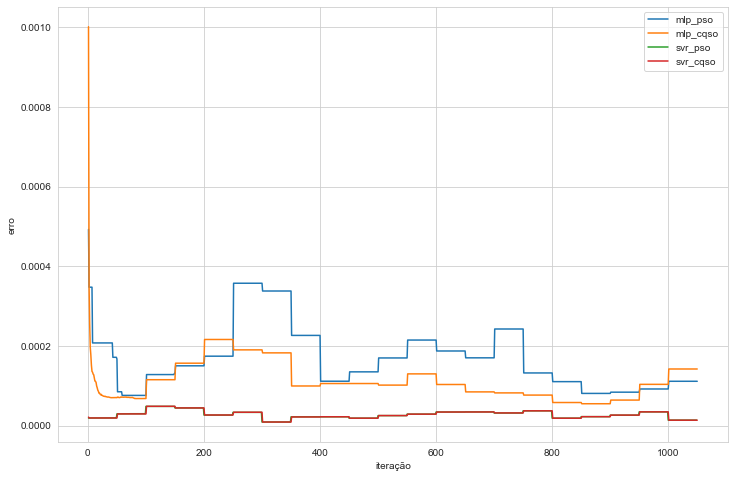

In [64]:
plota_graf(sunspot_treino_1, 'sunspot_treino_1')

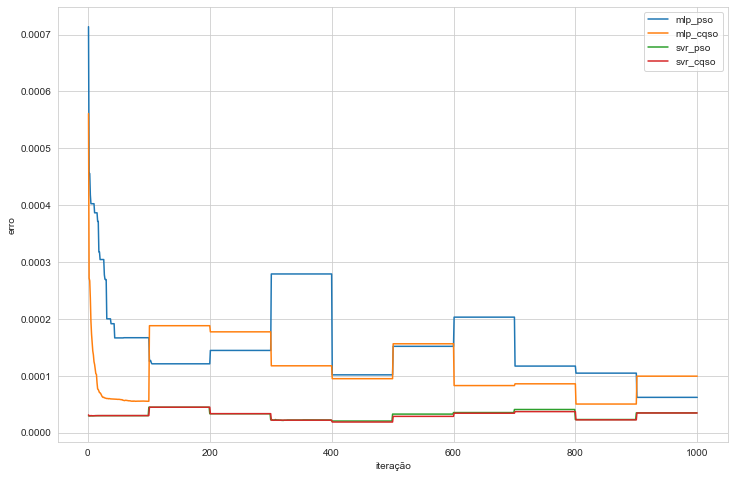

In [65]:
plota_graf(sunspot_treino_2, 'sunspot_treino_2')

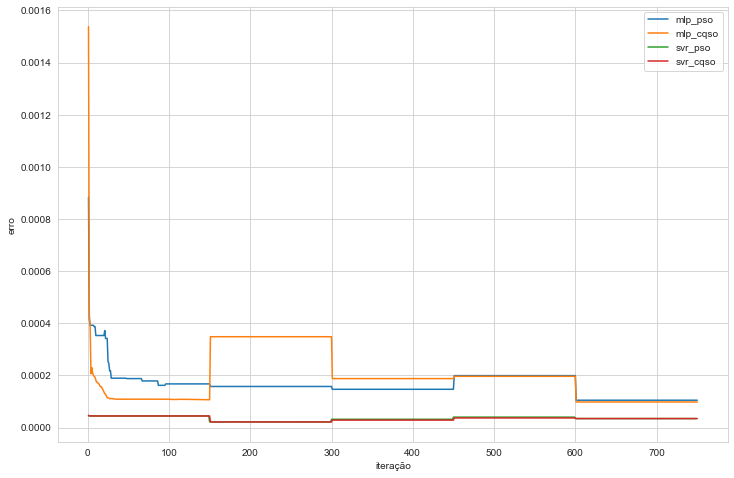

In [66]:
plota_graf(sunspot_treino_3, 'sunspot_treino_3')

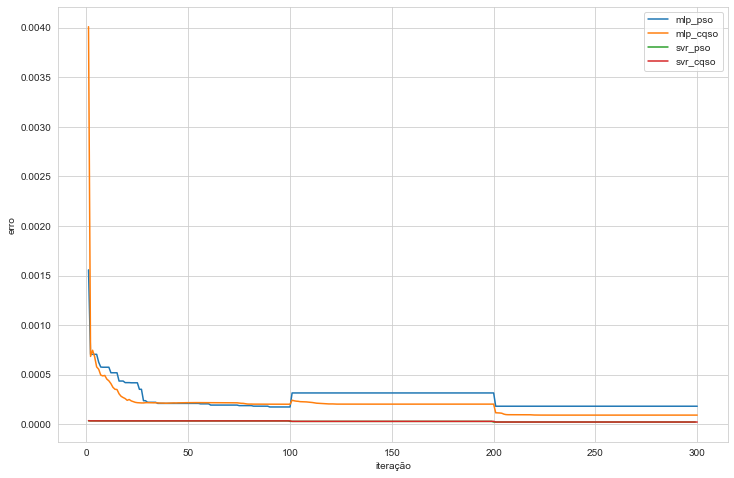

In [67]:
plota_graf(sunspot_treino_4, 'sunspot_treino_4')

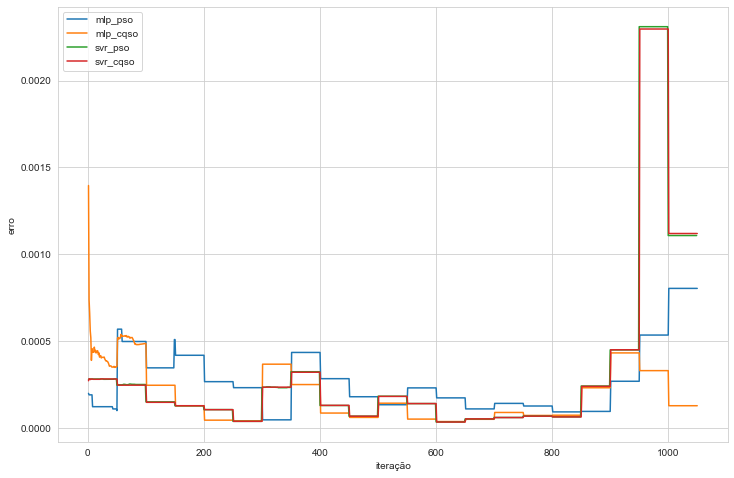

In [69]:
plota_graf(sunspot_teste_1, 'sunspot_teste_1')

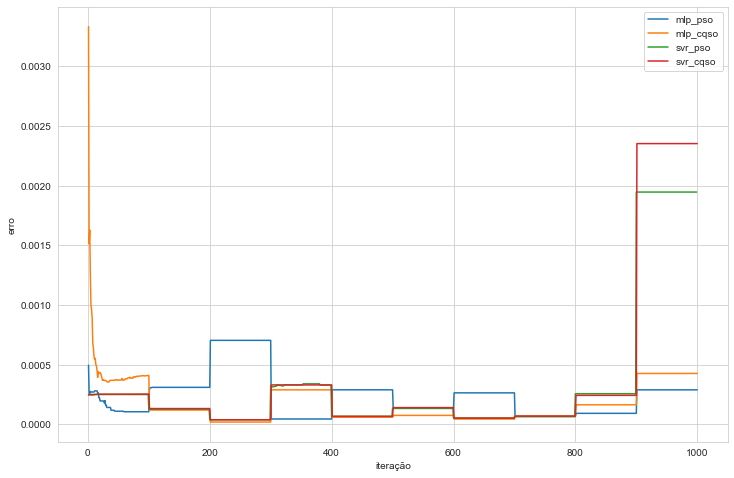

In [70]:
plota_graf(sunspot_teste_2, 'sunspot_teste_2')

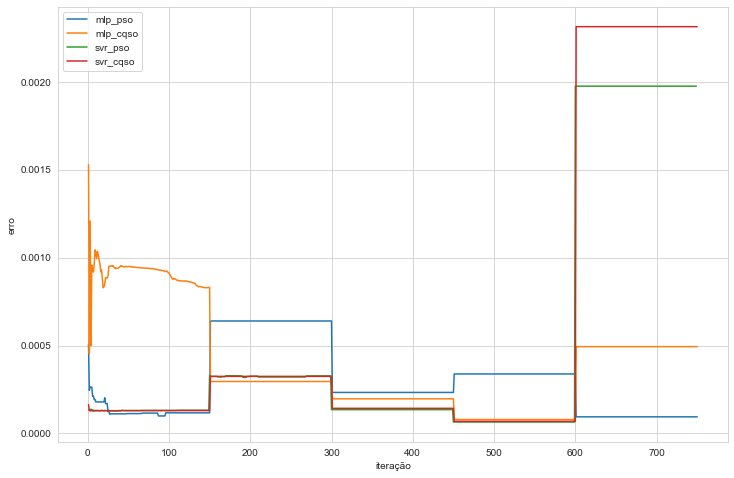

In [71]:
plota_graf(sunspot_teste_3, 'sunspot_teste_3')

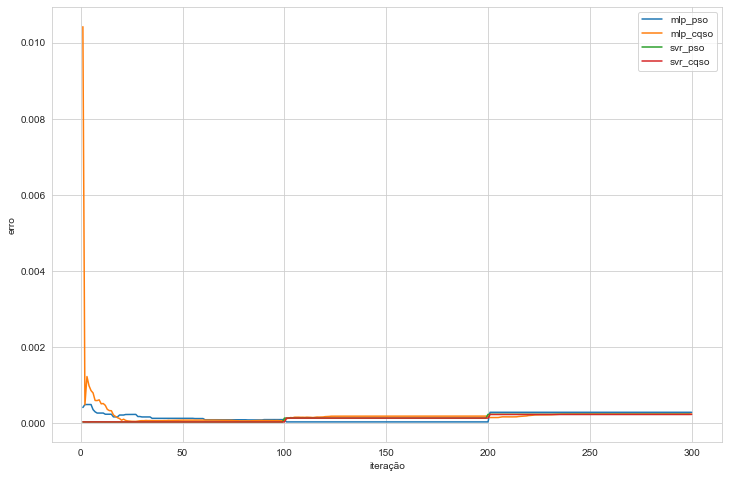

In [72]:
plota_graf(sunspot_teste_4, 'sunspot_teste_4')

In [73]:
print('Treinamento')
print('\nCenário 1:\n{}'.format(sunspot_treino_1.mean()))
print('\nCenário 2:\n{}'.format(sunspot_treino_2.mean()))
print('\nCenário 3:\n{}'.format(sunspot_treino_3.mean()))
print('\nCenário 4:\n{}'.format(sunspot_treino_4.mean()))

Treinamento

Cenário 1:
mlp_pso     0.000168
mlp_cqso    0.000112
svr_pso     0.000028
svr_cqso    0.000028
dtype: float64

Cenário 2:
mlp_pso     0.000152
mlp_cqso    0.000113
svr_pso     0.000032
svr_cqso    0.000031
dtype: float64

Cenário 3:
mlp_pso     0.000164
mlp_cqso    0.000193
svr_pso     0.000035
svr_cqso    0.000033
dtype: float64

Cenário 4:
mlp_pso     0.000264
mlp_cqso    0.000199
svr_pso     0.000028
svr_cqso    0.000029
dtype: float64


In [74]:
print('Teste')
print('\nCenário 1:\n{}'.format(sunspot_teste_1.mean()))
print('\nCenário 2:\n{}'.format(sunspot_teste_2.mean()))
print('\nCenário 3:\n{}'.format(sunspot_teste_3.mean()))
print('\nCenário 4:\n{}'.format(sunspot_teste_4.mean()))

Teste

Cenário 1:
mlp_pso     0.000266
mlp_cqso    0.000182
svr_pso     0.000307
svr_cqso    0.000306
dtype: float64

Cenário 2:
mlp_pso     0.000236
mlp_cqso    0.000176
svr_pso     0.000328
svr_cqso    0.000369
dtype: float64

Cenário 3:
mlp_pso     0.000287
mlp_cqso    0.000395
svr_pso     0.000526
svr_cqso    0.000596
dtype: float64

Cenário 4:
mlp_pso     0.000166
mlp_cqso    0.000226
svr_pso     0.000141
svr_cqso    0.000140
dtype: float64


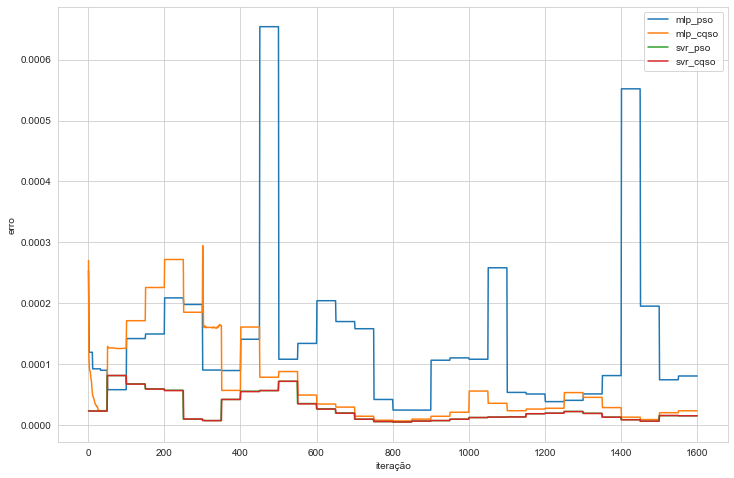

In [77]:
plota_graf(sp500_treino_1, 'sp500_treino_1')

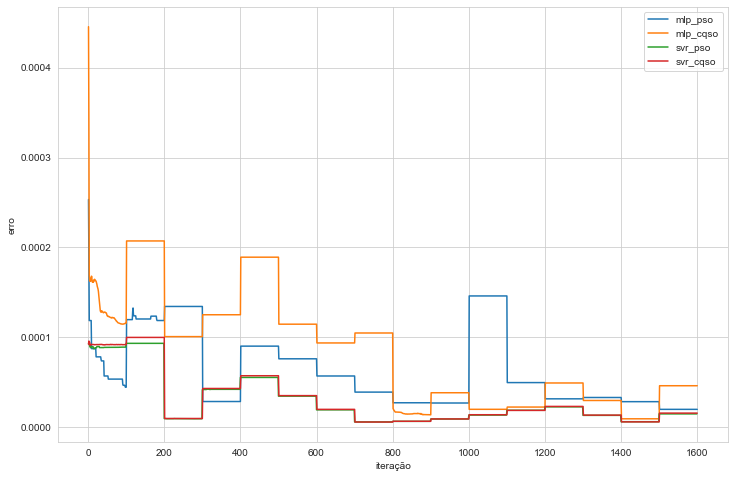

In [78]:
plota_graf(sp500_treino_2, 'sp500_treino_2')

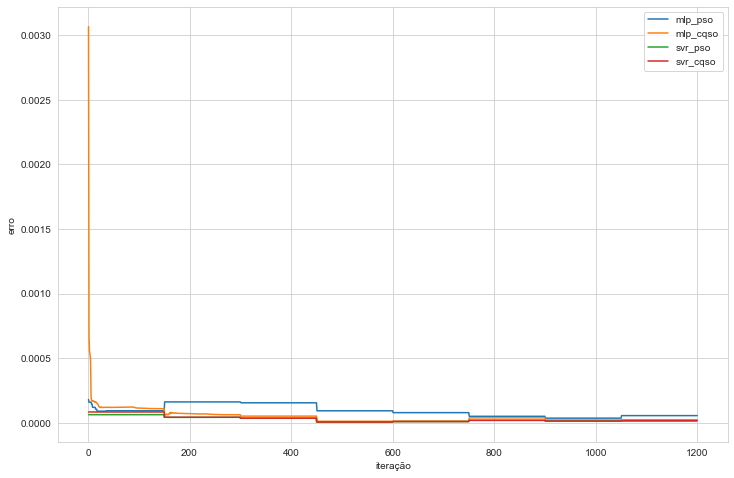

In [79]:
plota_graf(sp500_treino_3, 'sp500_treino_3')

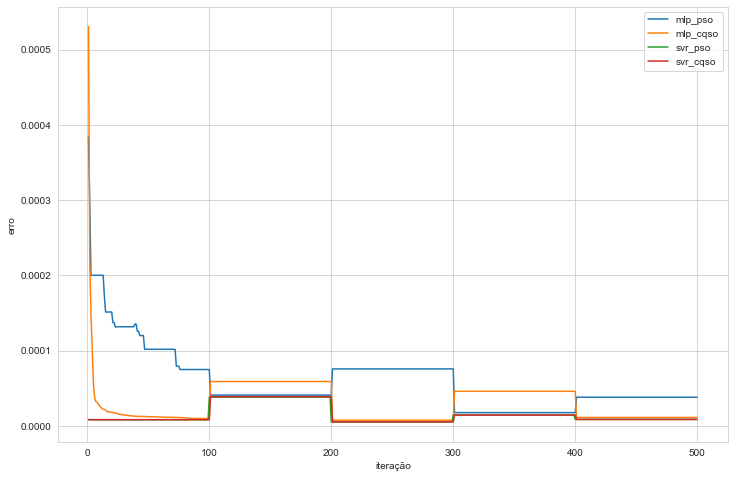

In [80]:
plota_graf(sp500_treino_4, 'sp500_treino_4')

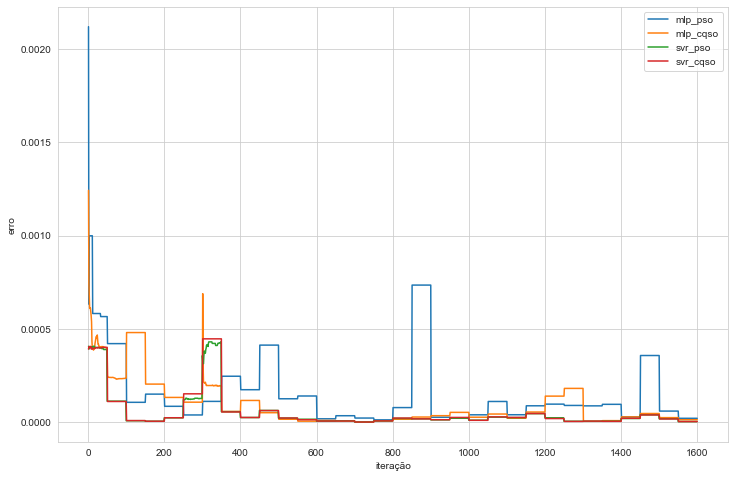

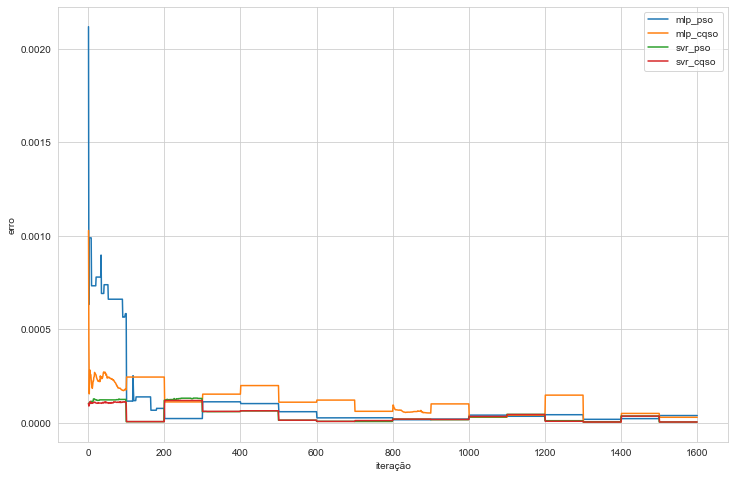

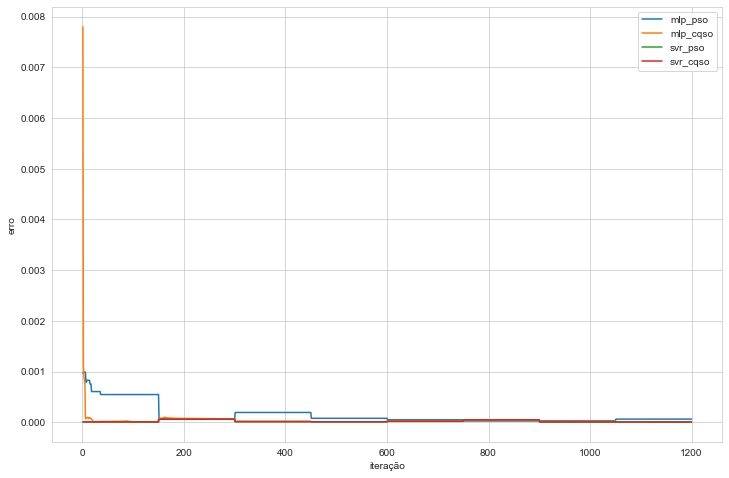

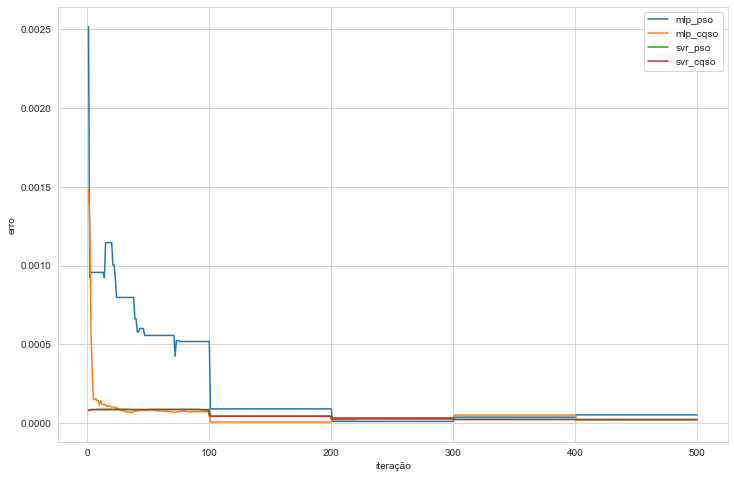

In [81]:
plota_graf(sp500_teste_1, 'sp500_teste_1')
plota_graf(sp500_teste_2, 'sp500_teste_2')
plota_graf(sp500_teste_3, 'sp500_teste_3')
plota_graf(sp500_teste_4, 'sp500_teste_4')

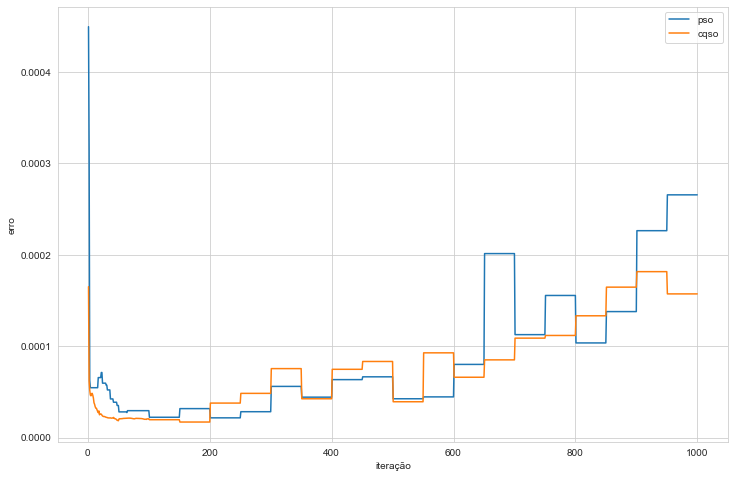

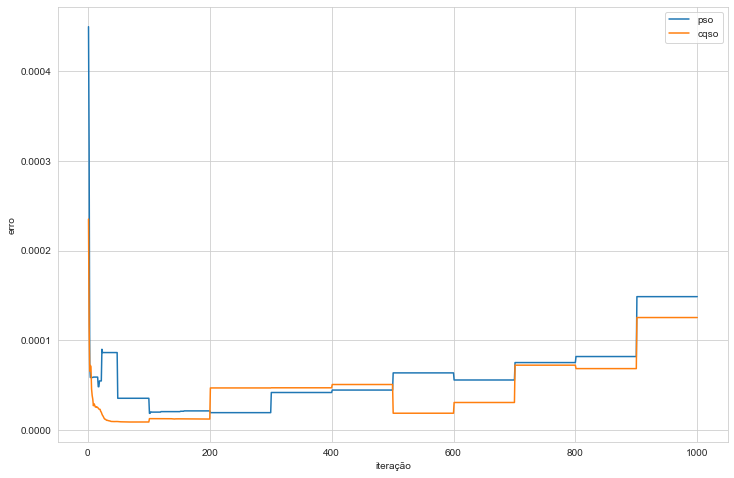

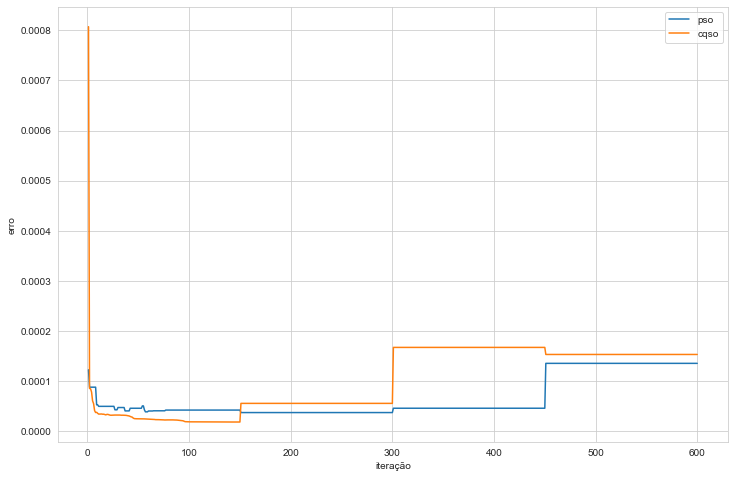

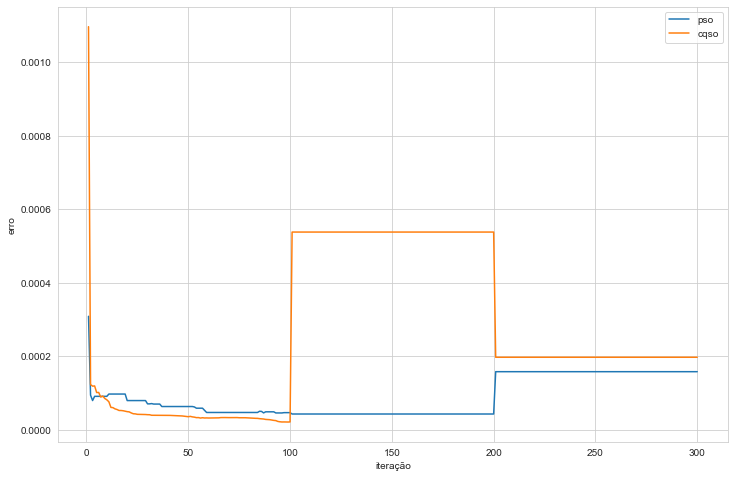

In [159]:
plota_graf(airline_treino_media_1, 'airline_treino_media_1')
plota_graf(airline_treino_media_2, 'airline_treino_media_2')
plota_graf(airline_treino_media_3, 'airline_treino_media_3')
plota_graf(airline_treino_media_4, 'airline_treino_media_4')

Teste Airline IAP


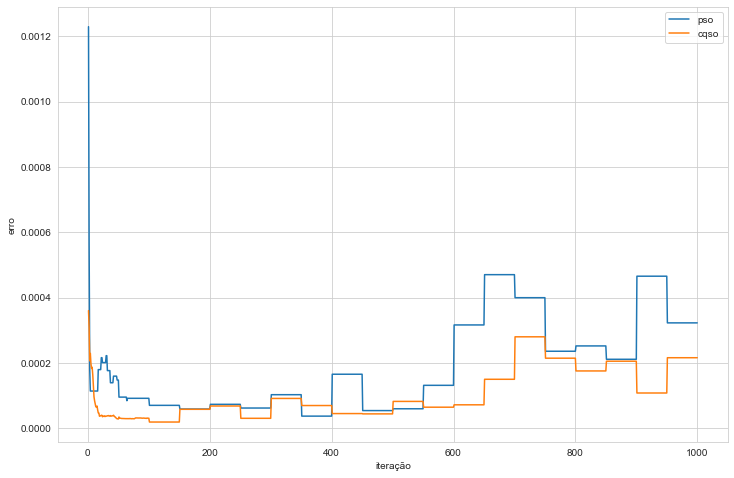

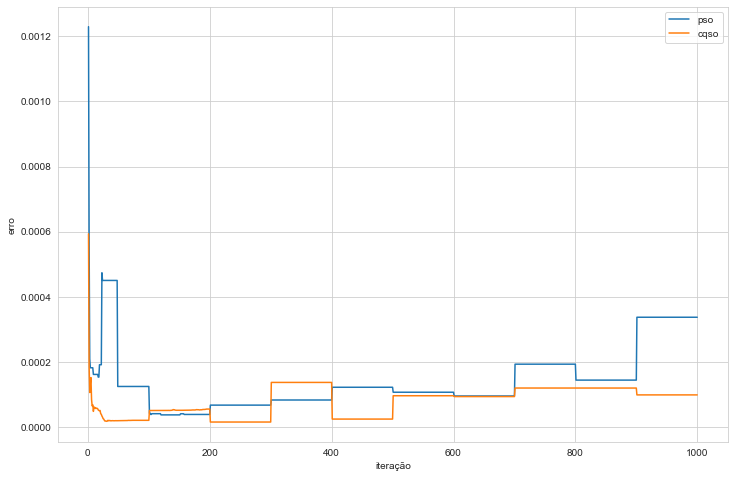

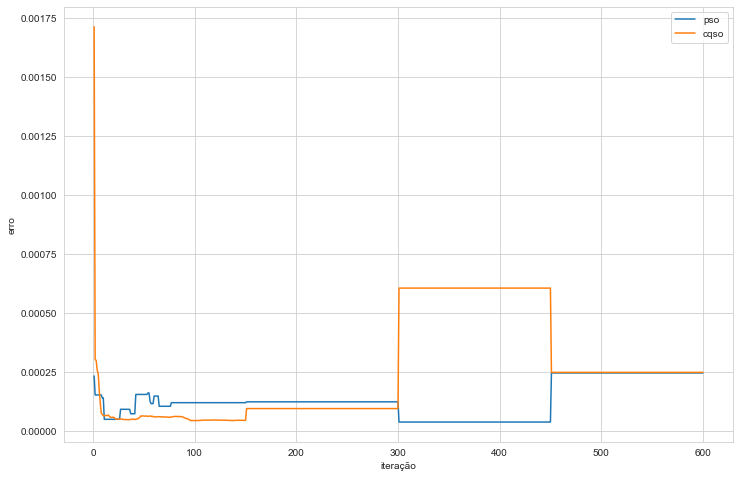

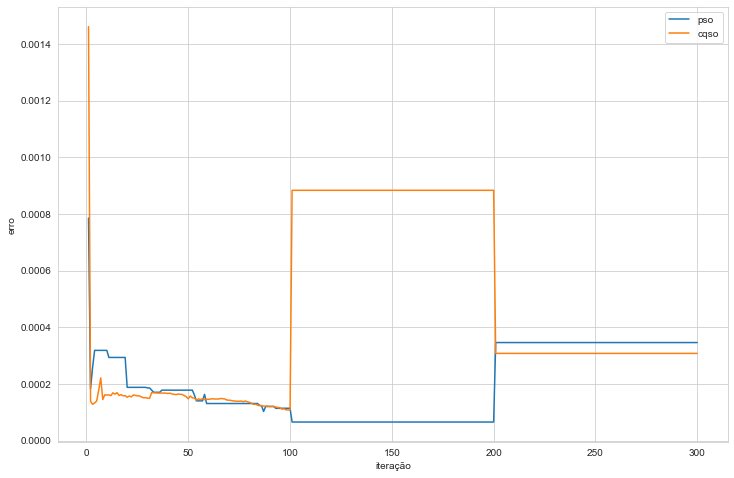

In [193]:
# Teste Airline IAP
print("Teste Airline IAP")
plota_graf(airline_teste_media_1, 'airline_teste_media_1')
plota_graf(airline_teste_media_2, 'airline_teste_media_2')
plota_graf(airline_teste_media_3, 'airline_teste_media_3')
plota_graf(airline_teste_media_4, 'airline_teste_media_4')

Treinamento AWS


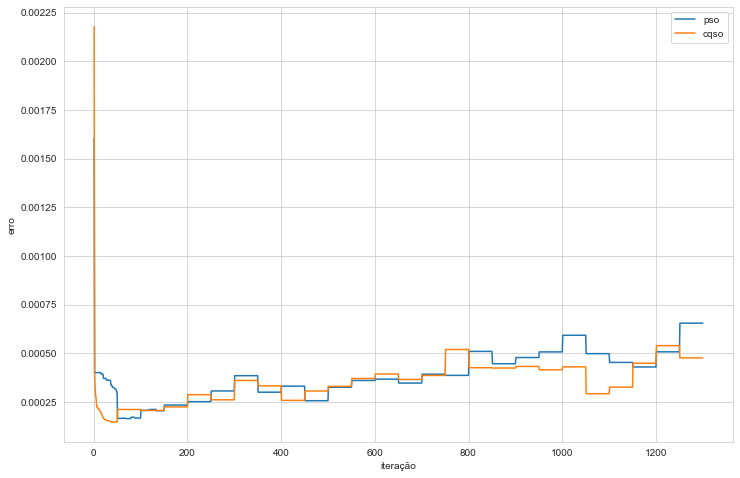

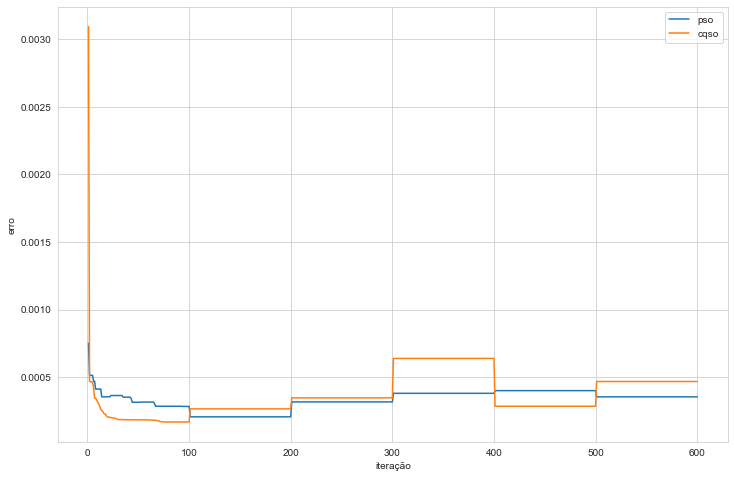

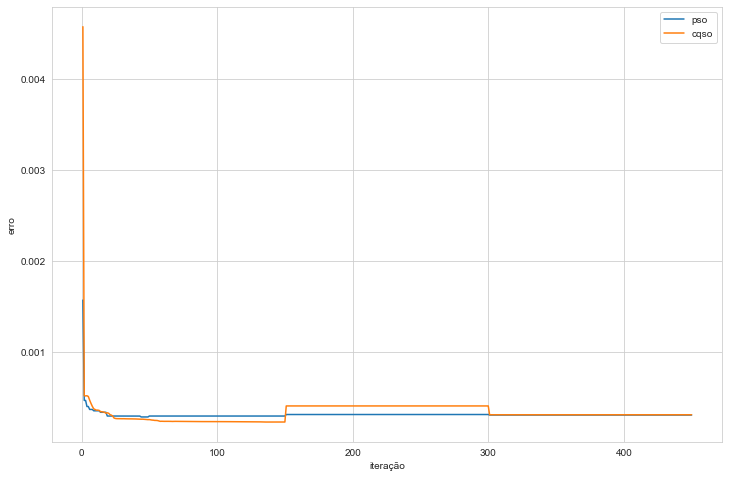

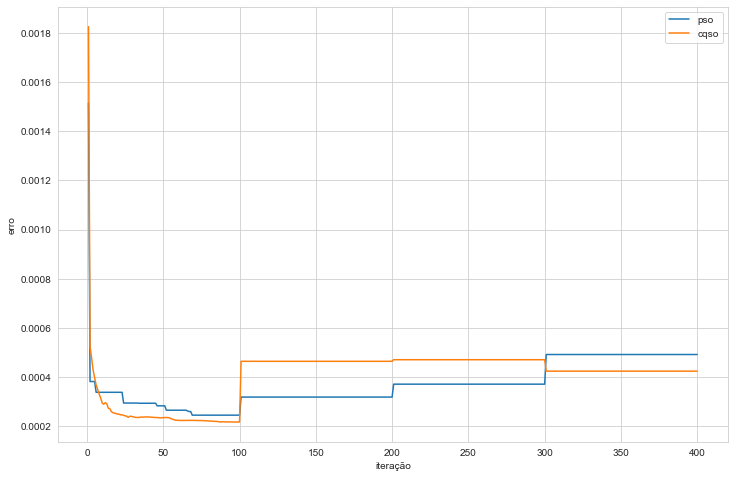

In [192]:
#Treino
print("Treinamento AWS")
plota_graf(aws_treino_media_1, 'aws_treino_media_1')
plota_graf(aws_treino_media_2, 'aws_treino_media_2')
plota_graf(aws_treino_media_3, 'aws_treino_media_3')
plota_graf(aws_treino_media_4, 'aws_treino_media_4')

Teste AWS


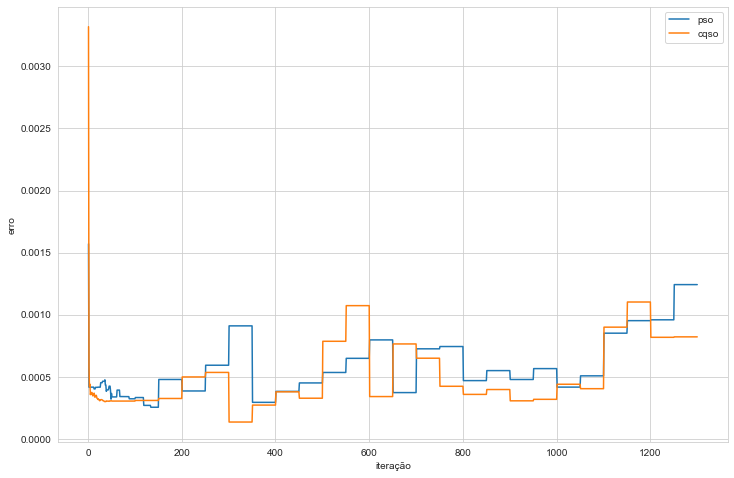

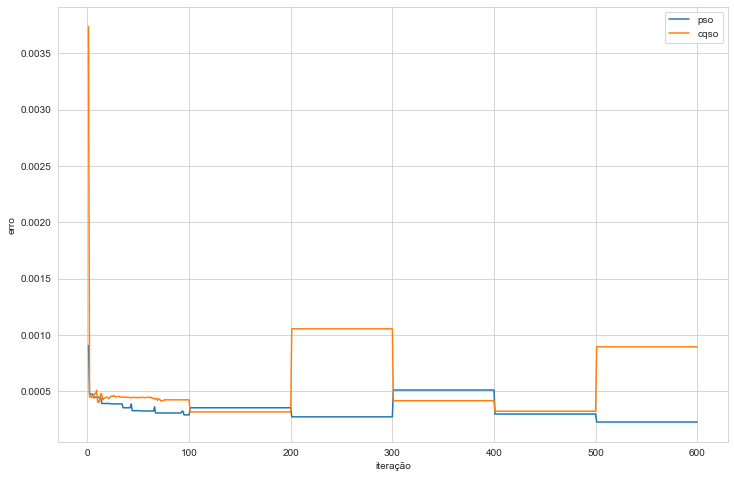

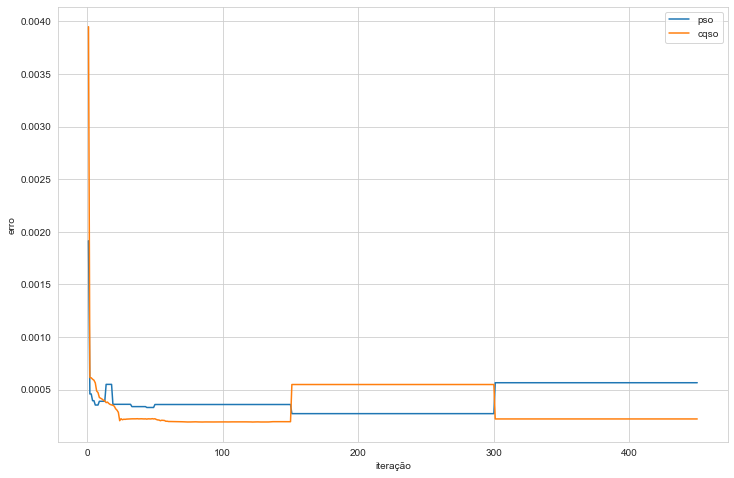

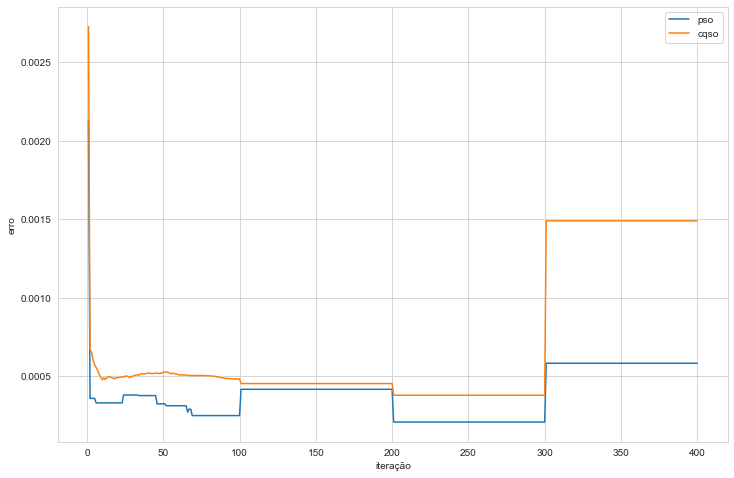

In [191]:
# Teste AWS
print("Teste AWS")
plota_graf(aws_teste_media_1, 'aws_teste_media_1')
plota_graf(aws_teste_media_2, 'aws_teste_media_2')
plota_graf(aws_teste_media_3, 'aws_teste_media_3')
plota_graf(aws_teste_media_4, 'aws_teste_media_4')

Treinamento USD


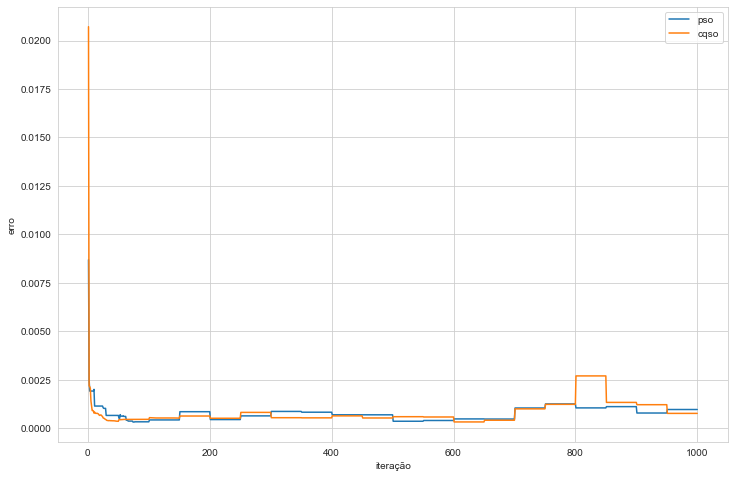

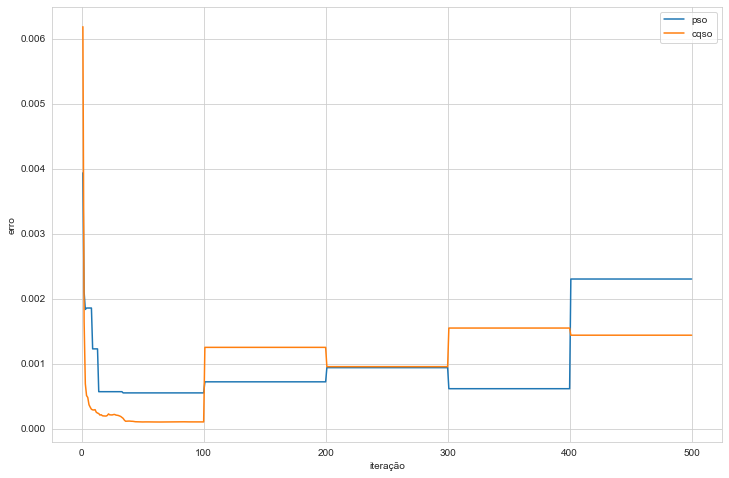

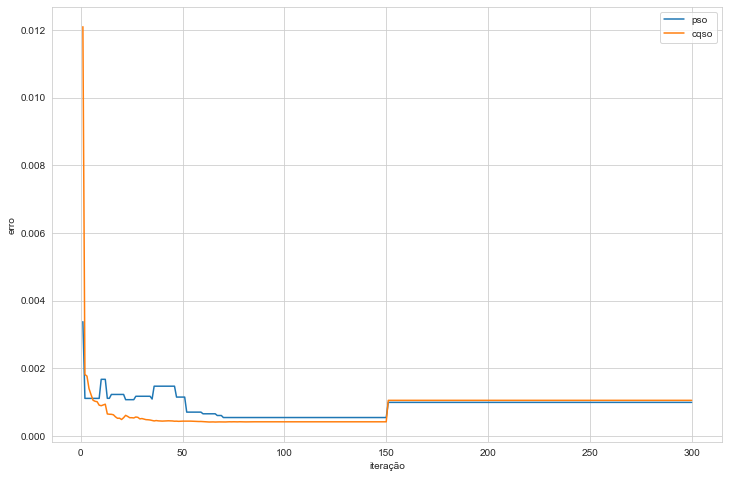

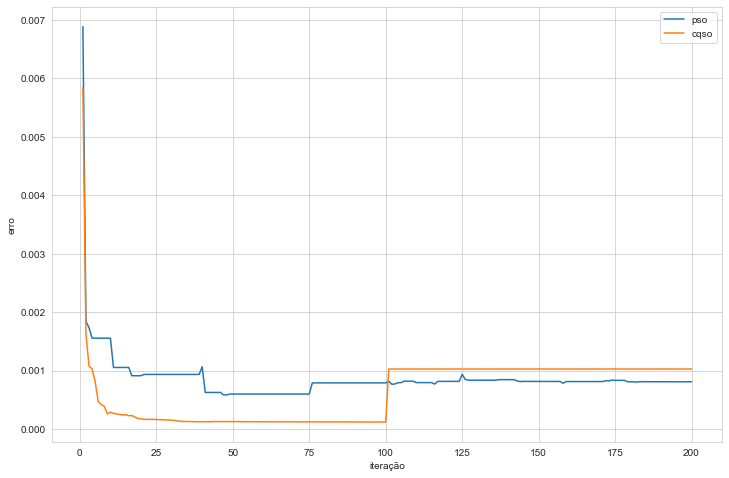

In [195]:
# Treinamento USD
print("Treinamento USD")
plota_graf(usd_treino_media_1, 'aws_treino_media_1')
plota_graf(usd_treino_media_2, 'aws_treino_media_2')
plota_graf(usd_treino_media_3, 'aws_treino_media_3')
plota_graf(usd_treino_media_4, 'aws_treino_media_4')

Teste USD


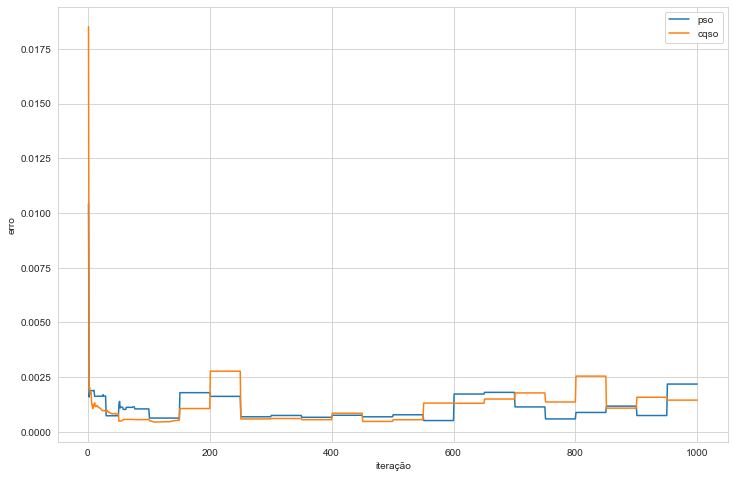

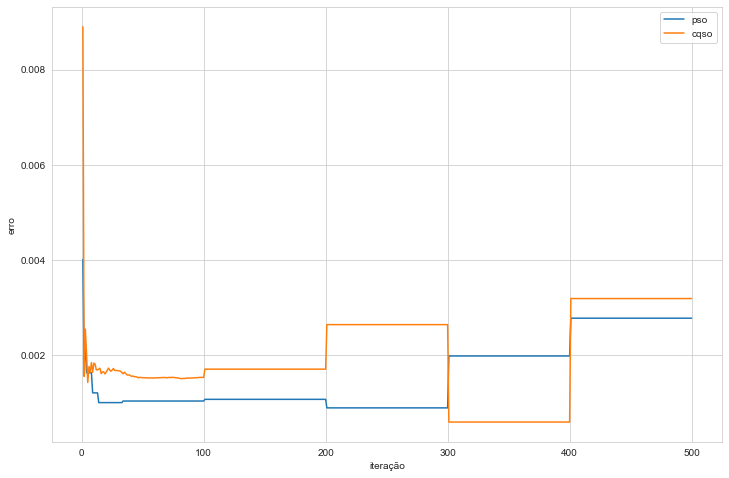

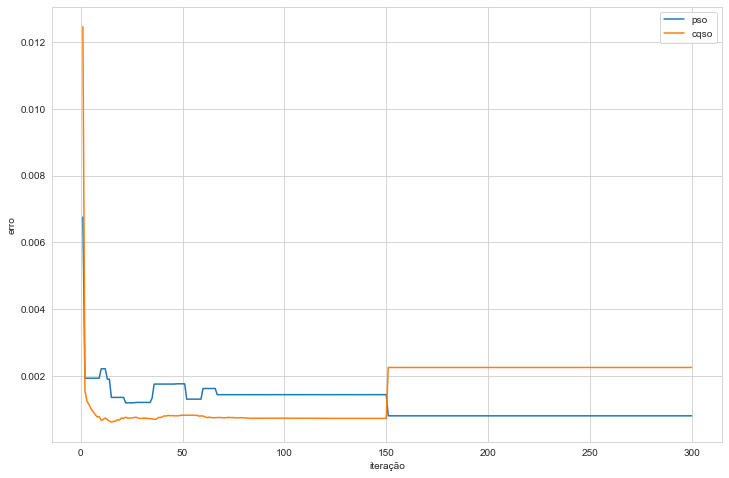

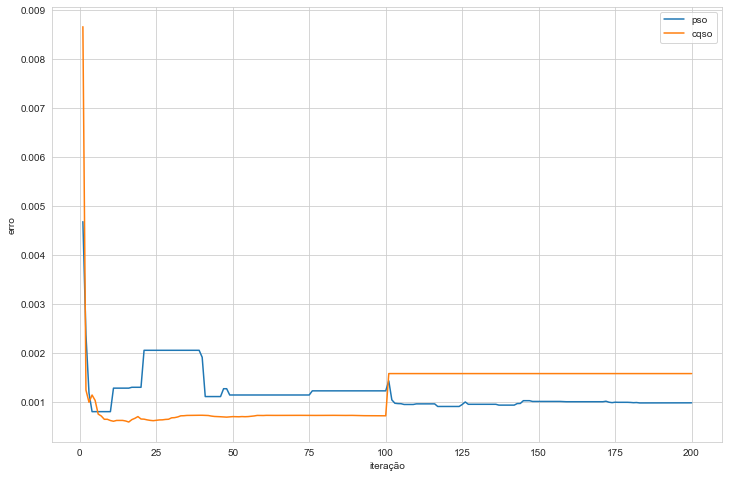

In [196]:
# Teste USD
print("Teste USD")
plota_graf(usd_teste_media_1, 'aws_teste_media_1')
plota_graf(usd_teste_media_2, 'aws_teste_media_2')
plota_graf(usd_teste_media_3, 'aws_teste_media_3')
plota_graf(usd_teste_media_4, 'aws_teste_media_4')